<a href="https://colab.research.google.com/github/Zoeayilara/Zoeayilara/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random

# Parameters for the dataset
n_samples = 500  # Number of samples
locations = ["Urban", "Rural"]
times_of_day = ["Morning", "Evening"]
food_availability = ["Yes", "No"]

# Generate the dataset
rodent_data = {
    "Location": [random.choice(locations) for _ in range(n_samples)],
    "Time_of_Day": [random.choice(times_of_day) for _ in range(n_samples)],
    "Temperature": [round(random.uniform(15, 40), 1) for _ in range(n_samples)],  # Temperature in °C
    "Food_Availability": [random.choice(food_availability) for _ in range(n_samples)],
    "Rodent_Presence": [random.choice([0, 1]) for _ in range(n_samples)],  # Target variable: 0 (No), 1 (Yes)
}

# Create a DataFrame
rodent_df = pd.DataFrame(rodent_data)

# Save the dataset to a CSV file
rodent_df.to_csv("rodent_prediction_dataset.csv", index=False)

print("Dataset created and saved as 'rodent_prediction_dataset.csv'")



Dataset created and saved as 'rodent_prediction_dataset.csv'


In [ ]:
print(rodent_df.head())


  Location Time_of_Day  Temperature Food_Availability  Rodent_Presence
0    Urban     Morning         26.1                No                1
1    Rural     Morning         19.6               Yes                0
2    Rural     Evening         25.0               Yes                1
3    Rural     Evening         39.7                No                1
4    Urban     Evening         32.6               Yes                0


In [ ]:
df = pd.read_csv("rodent_prediction_dataset.csv")
print(df.head())


  Location Time_of_Day  Temperature Food_Availability  Rodent_Presence
0    Urban     Morning         26.1                No                1
1    Rural     Morning         19.6               Yes                0
2    Rural     Evening         25.0               Yes                1
3    Rural     Evening         39.7                No                1
4    Urban     Evening         32.6               Yes                0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Rodent_Presence", axis=1)
y = df["Rodent_Presence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Rural'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
from sklearn.model_selection import train_test_split

X = df.drop("Rodent_Presence", axis=1)
y = df["Rodent_Presence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the categorical features and transform them
categorical_features = ['Location', 'Time_of_Day', 'Food_Availability']
encoded_features = encoder.fit_transform(X_train[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features
X_train = X_train.drop(categorical_features, axis=1)
X_train = pd.concat([X_train, encoded_df], axis=1)

# Repeat for X_test
encoded_features = encoder.transform(X_test[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X_test = X_test.drop(categorical_features, axis=1)
X_test = pd.concat([X_test, encoded_df], axis=1)

# Now you can fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [476, 400]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Split the data first
X = df.drop("Rodent_Presence", axis=1)
y = df["Rodent_Presence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the categorical features and transform them
categorical_features = ['Location', 'Time_of_Day', 'Food_Availability']

# Fit and transform on the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index) # Use the original index
X_train = X_train.drop(categorical_features, axis=1)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)

# Transform the test data
X_test_encoded = encoder.transform(X_test[categorical_features])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index) # Use the original index
X_test = X_test.drop(categorical_features, axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Now you can fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.49      0.51        53
           1       0.47      0.51      0.49        47

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100



First 5 rows of the dataset:
  Location Time_of_Day  Temperature Food_Availability  Rodent_Presence
0    Urban     Morning         26.1                No                1
1    Rural     Morning         19.6               Yes                0
2    Rural     Evening         25.0               Yes                1
3    Rural     Evening         39.7                No                1
4    Urban     Evening         32.6               Yes                0

Missing values in each column:
Location             0
Time_of_Day          0
Temperature          0
Food_Availability    0
Rodent_Presence      0
dtype: int64

Distribution of Rodent Presence:
Rodent_Presence
1    251
0    249
Name: count, dtype: int64


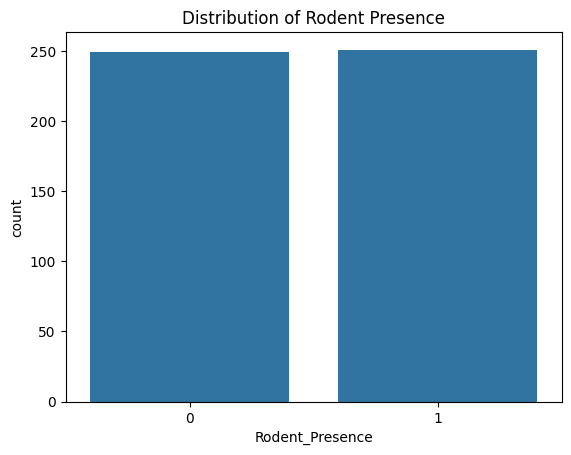


Distribution of Locations:
Location
Rural    251
Urban    249
Name: count, dtype: int64


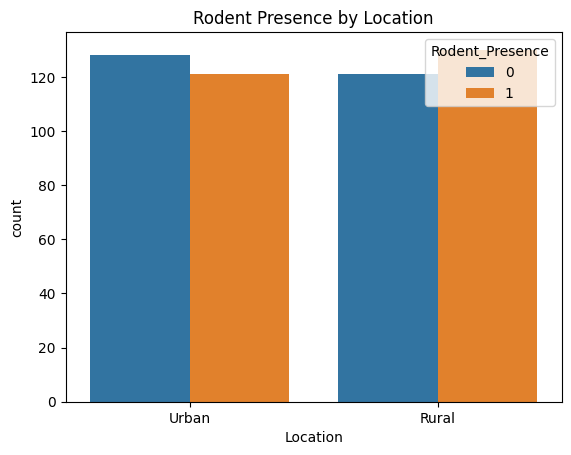


Summary statistics for Temperature:
count    500.000000
mean      27.706200
std        7.215344
min       15.000000
25%       21.475000
50%       27.400000
75%       34.000000
max       40.000000
Name: Temperature, dtype: float64


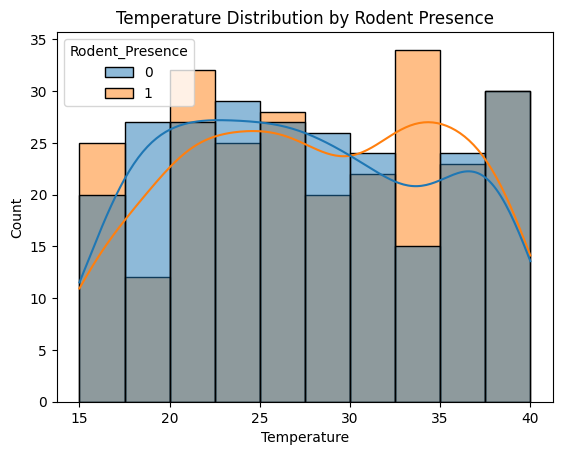

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("rodent_prediction_dataset.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the distribution of the target variable
print("\nDistribution of Rodent Presence:")
print(df["Rodent_Presence"].value_counts())

# Plot distributions
sns.countplot(data=df, x="Rodent_Presence")
plt.title("Distribution of Rodent Presence")
plt.show()

# Analyze categorical features
print("\nDistribution of Locations:")
print(df["Location"].value_counts())

sns.countplot(data=df, x="Location", hue="Rodent_Presence")
plt.title("Rodent Presence by Location")
plt.show()

# Analyze Temperature
print("\nSummary statistics for Temperature:")
print(df["Temperature"].describe())

sns.histplot(data=df, x="Temperature", kde=True, hue="Rodent_Presence")
plt.title("Temperature Distribution by Rodent Presence")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
encoder = LabelEncoder()
df["Location"] = encoder.fit_transform(df["Location"])  # Urban=1, Rural=0
df["Time_of_Day"] = encoder.fit_transform(df["Time_of_Day"])  # Morning=1, Evening=0
df["Food_Availability"] = encoder.fit_transform(df["Food_Availability"])  # Yes=1, No=0

# Scale numerical features
scaler = StandardScaler()
df["Temperature"] = scaler.fit_transform(df[["Temperature"]])

# Display preprocessed data
print("\nPreprocessed dataset:")
print(df.head())



Preprocessed dataset:
   Location  Time_of_Day  Temperature  Food_Availability  Rodent_Presence
0         1            1    -0.222832                  0                1
1         0            1    -1.124592                  1                0
2         0            0    -0.375437                  1                1
3         0            0     1.663928                  0                1
4         1            0     0.678928                  1                0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("Rodent_Presence", axis=1)
y = df["Rodent_Presence"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split completed:")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")



Data split completed:
Training samples: 400, Testing samples: 100


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("\nModel training completed.")



Model training completed.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        53
           1       0.52      0.55      0.54        47

    accuracy                           0.55       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.55      0.55      0.55       100


Confusion Matrix:
[[29 24]
 [21 26]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train a new model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        53
           1       0.53      0.57      0.55        47

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.56      0.56       100


Confusion Matrix for Best Model:
[[29 24]
 [20 27]]


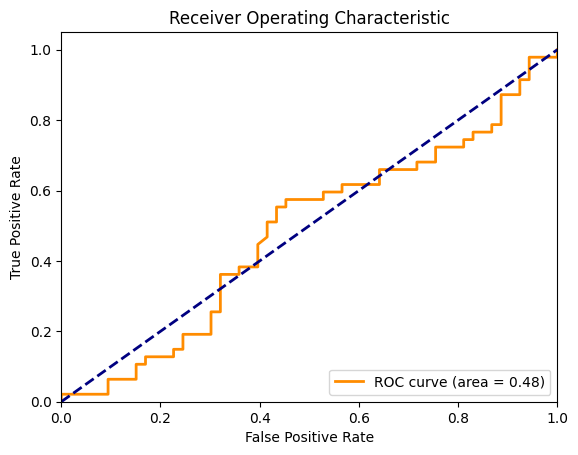

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

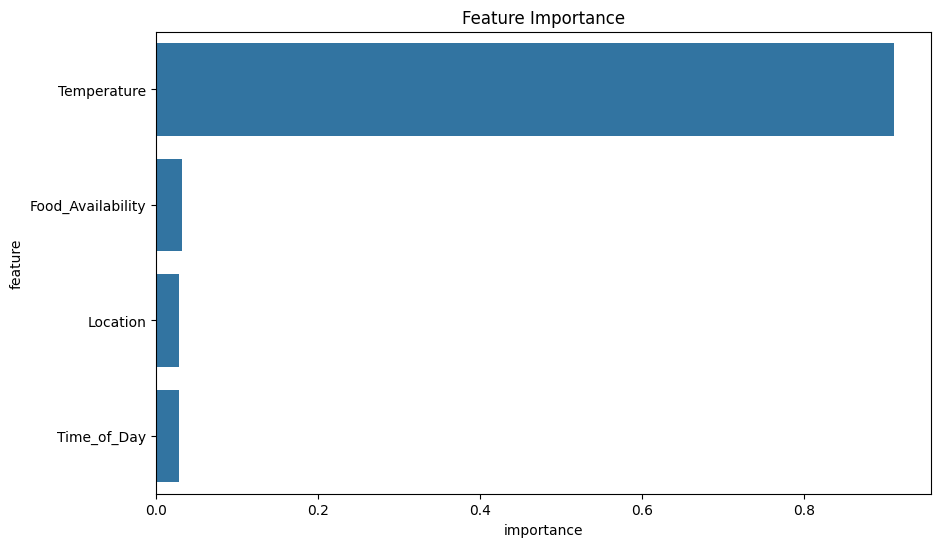

In [ ]:
# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'rodent_prediction_model.pkl')

['rodent_prediction_model.pkl']

In [ ]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('rodent_prediction_model.pkl')
print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
# Example new data
new_data = pd.DataFrame({
    "Location": ["Urban", "Rural"],
    "Time_of_Day": ["Morning", "Evening"],
    "Temperature": [30.5, 20.3],
    "Food_Availability": ["Yes", "No"]
})
print("New data:")
print(new_data)


New data:
  Location Time_of_Day  Temperature Food_Availability
0    Urban     Morning         30.5               Yes
1    Rural     Evening         20.3                No


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
encoder = LabelEncoder()
new_data["Location"] = encoder.fit_transform(new_data["Location"])  # Urban=1, Rural=0
new_data["Time_of_Day"] = encoder.fit_transform(new_data["Time_of_Day"])  # Morning=1, Evening=0
new_data["Food_Availability"] = encoder.fit_transform(new_data["Food_Availability"])  # Yes=1, No=0

# Scale numerical features
scaler = StandardScaler()
new_data["Temperature"] = scaler.fit_transform(new_data[["Temperature"]])

print("\nPreprocessed new data:")
print(new_data)



Preprocessed new data:
   Location  Time_of_Day  Temperature  Food_Availability
0         1            1          1.0                  1
1         0            0         -1.0                  0


In [ ]:
# Make predictions
predictions = model.predict(new_data)

# Display results
new_data["Rodent_Presence"] = predictions
print("\nPredictions:")
print(new_data)



Predictions:
   Location  Time_of_Day  Temperature  Food_Availability  Rodent_Presence
0         1            1          1.0                  1                1
1         0            0         -1.0                  0                0
